In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
Memasukkan data

In [2]:
df=pd.read_csv('ihsg.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,2004-06-08,705.784973,707.044006,702.176025,703.578979,8389000
1,2004-06-09,704.049988,710.049011,703.331970,709.752991,8129700
2,2004-06-10,706.481995,708.443970,701.750977,706.841003,10711800
3,2004-06-11,706.341980,706.643005,700.424011,704.125000,5034400
4,2004-06-14,702.489014,702.489014,692.395996,696.338013,8258400


Plot Figure

Digunakan untuk menampilkan data harga saat pasar saham tutup setiap hari.

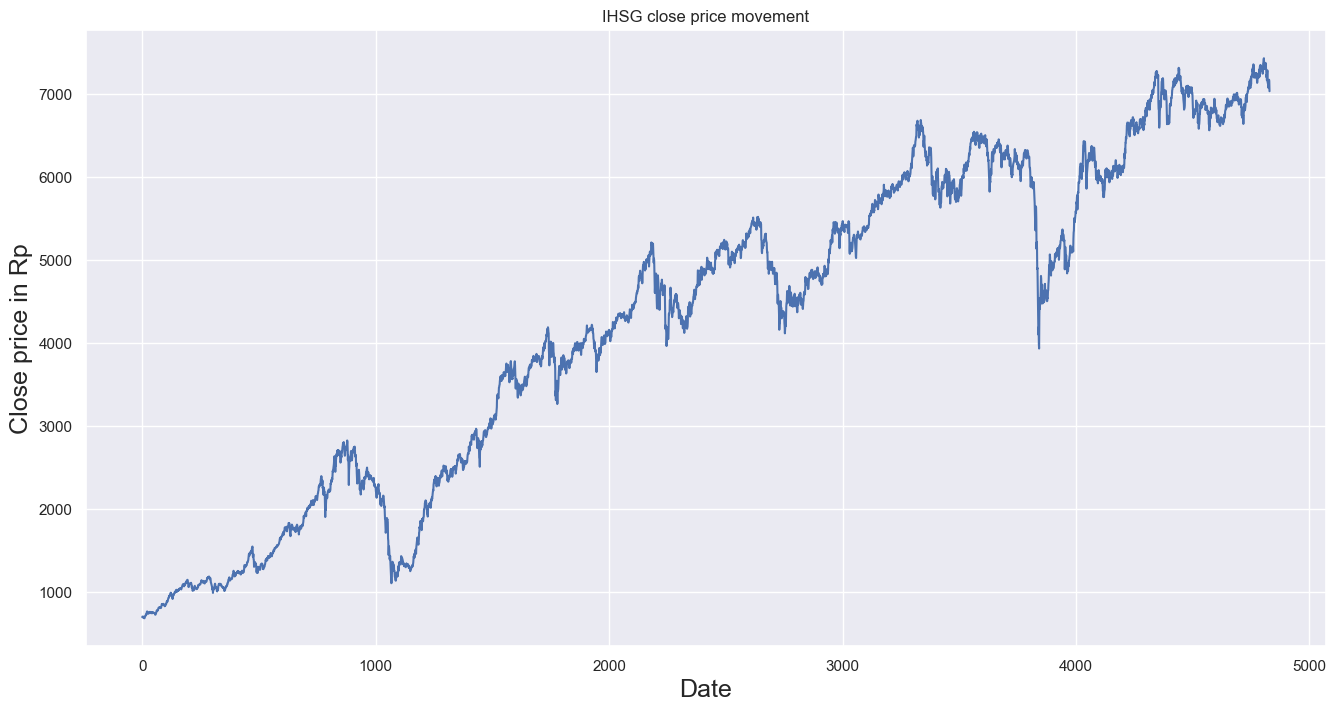

In [3]:
plt.figure(figsize=(16,8))
plt.title('IHSG close price movement')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price in Rp', fontsize=18)
plt.show()

Menghitung Jumlah data

Pada bagian ini, diambil data dari kolom 'Close' dari DataFrame df, mengonversinya ke dalam bentuk array NumPy, dan kemudian menghitung jumlah entri dalam array tersebut.

In [4]:
data = df.filter(['Close'])
dataset = data.values
len(dataset)

4830

Menghitung ukuran data

Dibagian ini digunakan untuk menghitung ukuran data pelatihan (training data size) yang akan digunakan, dengan menggunakan 70% dari total data yang ada dalam dataset.

In [5]:
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

3381

Mengatur rentang

Menyesuaikan data yang akan digunakan dengan rentang yang sudah diatur

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00207067],
       [0.00298619],
       [0.00255439],
       ...,
       [0.96162615],
       [0.95877323],
       [0.94109469]])

Mempersiapkan Data

Bagian ini akan mempersiapkan data untuk model time series dengan menggunakan pendekatan sliding window, di mana setiap data latihan (x_train) terdiri dari jendela 50 nilai sebelumnya dan targetnya (y_train) adalah nilai berikutnya setelah jendela tersebut. Metode ini umum digunakan untuk mempersiapkan data time series untuk pemodelan dan prediksi berikutnya.

In [7]:
train_data = scaled_data[0:training_data_size,:]
x_train = []
y_train = []
for i in range(50, len(train_data)):
    x_train.append(train_data[i-50:i,0])
    y_train.append(train_data[i,0])
    if i<=51:
        print(x_train)
        print(y_train)

[array([0.00207067, 0.00298619, 0.00255439, 0.00215164, 0.00099693,
       0.00263891, 0.0027095 , 0.00156028, 0.00045969, 0.        ,
       0.00021917, 0.00150377, 0.00292659, 0.00454009, 0.00458561,
       0.00484571, 0.00634459, 0.00596008, 0.00821656, 0.00821656,
       0.01166126, 0.01216676, 0.01039889, 0.0106062 , 0.01007756,
       0.0099303 , 0.00811142, 0.00826327, 0.00985809, 0.00958791,
       0.00994291, 0.01062088, 0.01066225, 0.01138129, 0.01070466,
       0.01033023, 0.01046681, 0.01058144, 0.00998977, 0.00887391,
       0.01003603, 0.01018566, 0.01073535, 0.00953735, 0.00896021,
       0.00931655, 0.01102244, 0.01016712, 0.00983214, 0.00924345])]
[0.009243445356841018]
[array([0.00207067, 0.00298619, 0.00255439, 0.00215164, 0.00099693,
       0.00263891, 0.0027095 , 0.00156028, 0.00045969, 0.        ,
       0.00021917, 0.00150377, 0.00292659, 0.00454009, 0.00458561,
       0.00484571, 0.00634459, 0.00596008, 0.00821656, 0.00821656,
       0.01166126, 0.01216676, 0.01

Melakukan konversi ke array NumPy dan mengubah bentuk x_train menggunakan np.reshape() sehingga dapat dapat digunakan untuk di-train ke model

In [8]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(3331, 50, 1)

Membuat model

Pada bagian ini, akan dibuat model yang akan dilatih. Model ini memiliki dua layer LSTM untuk memproses sequence data input, diikuti oleh dua
layer dense yang lebih sederhana untuk melakukan pemrosesan lebih lanjut dan menghasilkan output.

In [9]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Meng-compile model

In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')

Men-train model

In [11]:
model.fit(x_train, y_train, batch_size=1, epochs=50)

Epoch 1/50
3331/3331 ━━━━━━━━━━━━━━━━━━━━ 48s 14ms/step - loss: 0.0034
Epoch 2/50
3331/3331 ━━━━━━━━━━━━━━━━━━━━ 49s 15ms/step - loss: 4.4627e-04
Epoch 3/50
3331/3331 ━━━━━━━━━━━━━━━━━━━━ 47s 14ms/step - loss: 2.1465e-04
Epoch 4/50
3331/3331 ━━━━━━━━━━━━━━━━━━━━ 46s 14ms/step - loss: 1.6831e-04
Epoch 5/50
3331/3331 ━━━━━━━━━━━━━━━━━━━━ 47s 14ms/step - loss: 1.8506e-04
Epoch 6/50
3331/3331 ━━━━━━━━━━━━━━━━━━━━ 47s 14ms/step - loss: 1.9013e-04
Epoch 7/50
3331/3331 ━━━━━━━━━━━━━━━━━━━━ 47s 14ms/step - loss: 1.1870e-04
Epoch 8/50
3331/3331 ━━━━━━━━━━━━━━━━━━━━ 47s 14ms/step - loss: 9.8173e-05
Epoch 9/50
3331/3331 ━━━━━━━━━━━━━━━━━━━━ 47s 14ms/step - loss: 9.9343e-05
Epoch 10/50
3331/3331 ━━━━━━━━━━━━━━━━━━━━ 48s 14ms/step - loss: 1.0837e-04
Epoch 11/50
3331/3331 ━━━━━━━━━━━━━━━━━━━━ 45s 13ms/step - loss: 9.3660e-05
Epoch 12/50
3331/3331 ━━━━━━━━━━━━━━━━━━━━ 44s 13ms/step - loss: 8.7212e-05
Epoch 13/50
3331/3331 ━━━━━━━━━━━━━━━━━━━━ 45s 14ms/step - loss: 9.3704e-05
Epoch 14/50
3331/3331 ━━━

Mempersiapkan data

In [12]:
test_data = scaled_data[training_data_size-50:, :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(50, len(test_data)):
    x_test.append(test_data[i-50:i, 0])

Kode ini mengubah x_test dari list Python menjadi array NumPy dan mengubah bentuknya sehingga cocok dengan input yang diharapkan oleh model LSTM, yaitu (jumlah sampel, panjang sampel, 1), di mana setiap sampel adalah jendela 50 nilai time series sebelumnya.

In [13]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

Kode ini akan menggunakan model jaringan saraf (model) untuk melakukan prediksi kepada data uji (x_test). Setelah mendapatkan prediksi,
hasilnya akan diubah kembali ke skala semula dengan menggunakan metode inverse_transform dari objek scaler, yang sebelumnya digunakan untuk
normalisasi data, sehingga predictions berisi nilai prediksi dalam unit yang dapat dibandingkan dengan data asli.

In [14]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


Menghitung RMSE

In [ ]:
Kode ini akan menghitung Root Mean Squared Error (RMSE) antara predictions dan y_test dengan menghitung selisih kuadrat antara keduanya,
mengambil rata-rata dari selisih tersebut, dan menghitung akar kuadrat dari nilai rata-rata tersebut.

In [15]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)

Pe_train
Kode ini akna membagi data menjadi data pelatihan (train) dan data validasi (valid), yang nantinya akan digunakan untuk memvisualisasikan perbandingan antara harga penutupan yang sebenarnya (Close) dengan harga sesuai dengan prediksi model (predictions) menggunakan grafik matplotlib. Ini membantu dalam memahami performa model LSTM dalam memprediksi harga saham berdasarkan data historis yang telah dilatih.

C:\Users\MSI\AppData\Local\Temp\ipykernel_5312\1697647285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


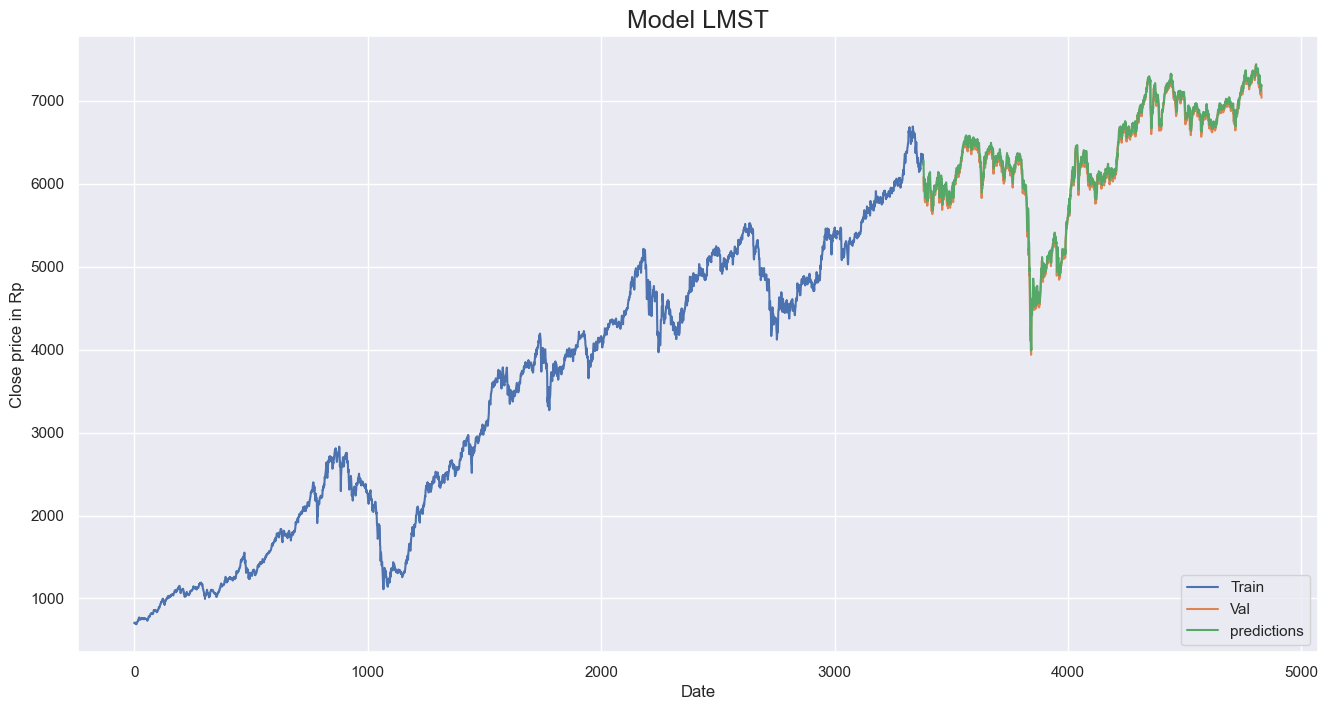

In [16]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model LMST', fontsize=18)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close price in Rp', fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show()

Menyimpan total weight

In [17]:
model.save_weights('lstm_model_ihsg2_weights.weights.h5')

After pretrain

Kode ini akan mengambil data harga penutupan saham BBCA, melakukan penskalaan data, dan mempersiapkan data yang akan di-train menggunakan model LSTM sebelumnya. Setelah melakukan fine-tuning model pada data baru, kode mengevaluasi performa model terhadap data uji, memprediksi harga penutupan, dan memvisualisasikan perbandingan antara data pelatihan, validasi, dan prediksi menggunakan grafik matplotlib.

Data preprocessing

In [18]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [19]:
df=pd.read_csv('BBCA.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,2004-06-08 00:00:00+07:00,101,104,101,103,499150000
1,2004-06-09 00:00:00+07:00,103,106,101,104,294290000
2,2004-06-10 00:00:00+07:00,104,104,103,104,165590000
3,2004-06-11 00:00:00+07:00,103,104,103,104,135830000
4,2004-06-14 00:00:00+07:00,104,104,101,103,158540000


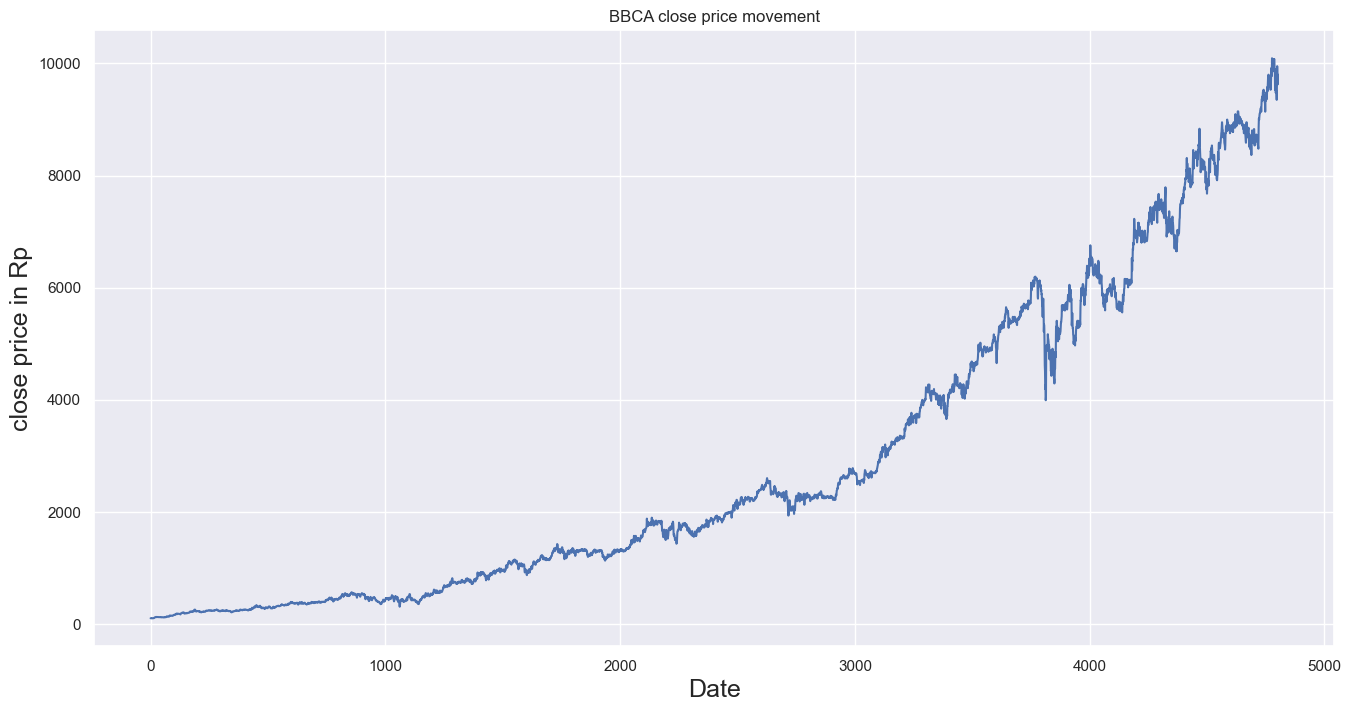

In [20]:
plt.figure(figsize=(16,8))
plt.title('BBCA close price movement')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in Rp', fontsize=18)
plt.show()

In [21]:
data = df.filter(['Close'])
dataset = data.values
len(dataset)

4803

In [22]:
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

3363

In [23]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00000000e+00],
       [1.00110121e-04],
       [1.00110121e-04],
       ...,
       [9.68265092e-01],
       [9.53248573e-01],
       [9.70767845e-01]])

Train model LSTM

Training fold 1...
Epoch 1/10


C:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2650/2650 ━━━━━━━━━━━━━━━━━━━━ 51s 18ms/step - loss: 6.6012e-04 - val_loss: 3.5068e-05
Epoch 2/10
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 45s 17ms/step - loss: 2.5604e-04 - val_loss: 1.2588e-04
Epoch 3/10
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - loss: 2.5715e-04 - val_loss: 1.0427e-04
Epoch 4/10
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - loss: 1.8916e-04 - val_loss: 3.8834e-05
Epoch 5/10
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 44s 16ms/step - loss: 1.9645e-04 - val_loss: 1.2851e-05
Epoch 6/10
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 44s 16ms/step - loss: 1.3893e-04 - val_loss: 8.8476e-05
Epoch 7/10
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - loss: 1.3939e-04 - val_loss: 2.3461e-05
Epoch 8/10
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - loss: 1.4200e-04 - val_loss: 8.6902e-05
Epoch 9/10
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - loss: 1.4129e-04 - val_loss: 4.1891e-05
Epoch 10/10
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 46s 17ms/step - loss: 1.5207e-04 - val_loss: 1.3948e-04
Training fold 2...
Epoch 1/10


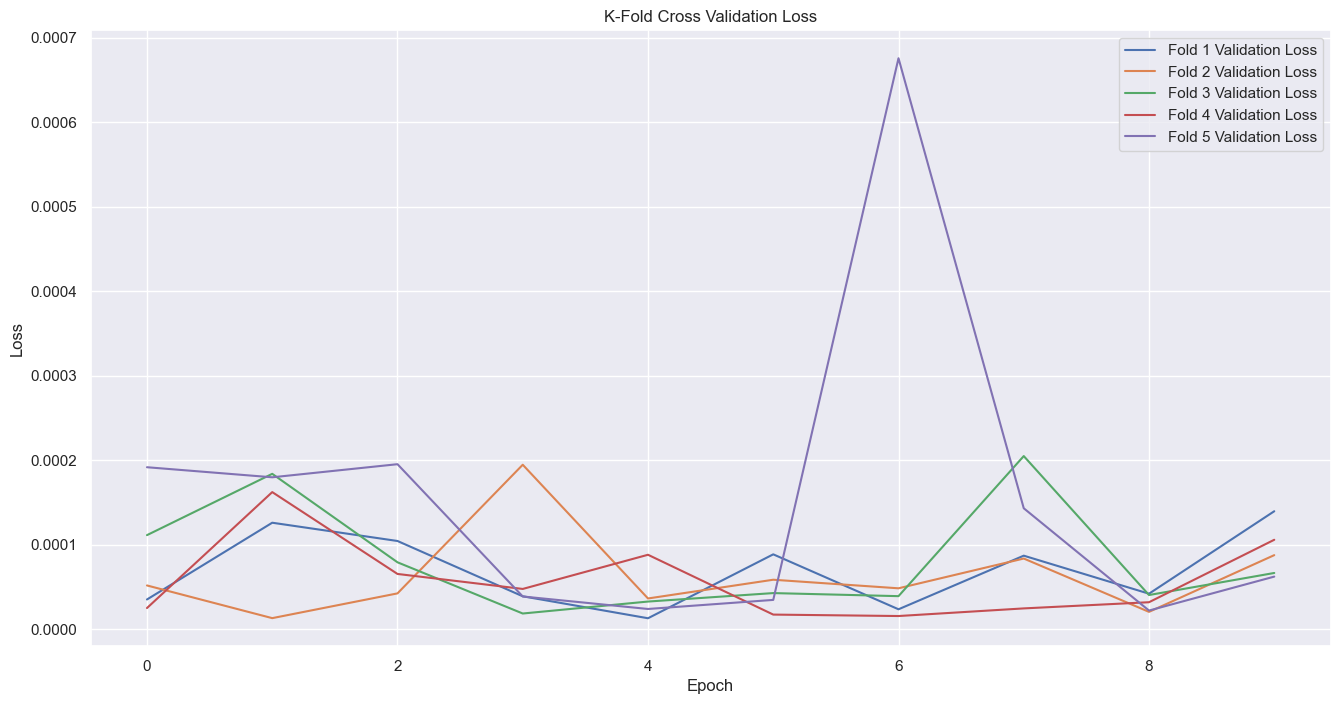

Epoch 1/10
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 47s 17ms/step - loss: 3.8388e-04 - val_loss: 1.1369e-04
Epoch 2/10
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 45s 17ms/step - loss: 1.5558e-04 - val_loss: 2.7523e-04
Epoch 3/10
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - loss: 7.9760e-05 - val_loss: 1.6092e-04
Epoch 4/10
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 45s 17ms/step - loss: 8.8141e-05 - val_loss: 2.3294e-05
Epoch 5/10
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - loss: 7.4475e-05 - val_loss: 2.2713e-05
Epoch 6/10
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 45s 17ms/step - loss: 6.9998e-05 - val_loss: 1.6780e-04
Epoch 7/10
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - loss: 6.2967e-05 - val_loss: 1.1852e-04
Epoch 8/10
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 45s 17ms/step - loss: 6.1781e-05 - val_loss: 1.6732e-04
Epoch 9/10
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 45s 17ms/step - loss: 6.5684e-05 - val_loss: 4.0412e-05
Epoch 10/10
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 45s 17ms/step - loss: 5.5397e-05 - val_loss: 1.9745e-04


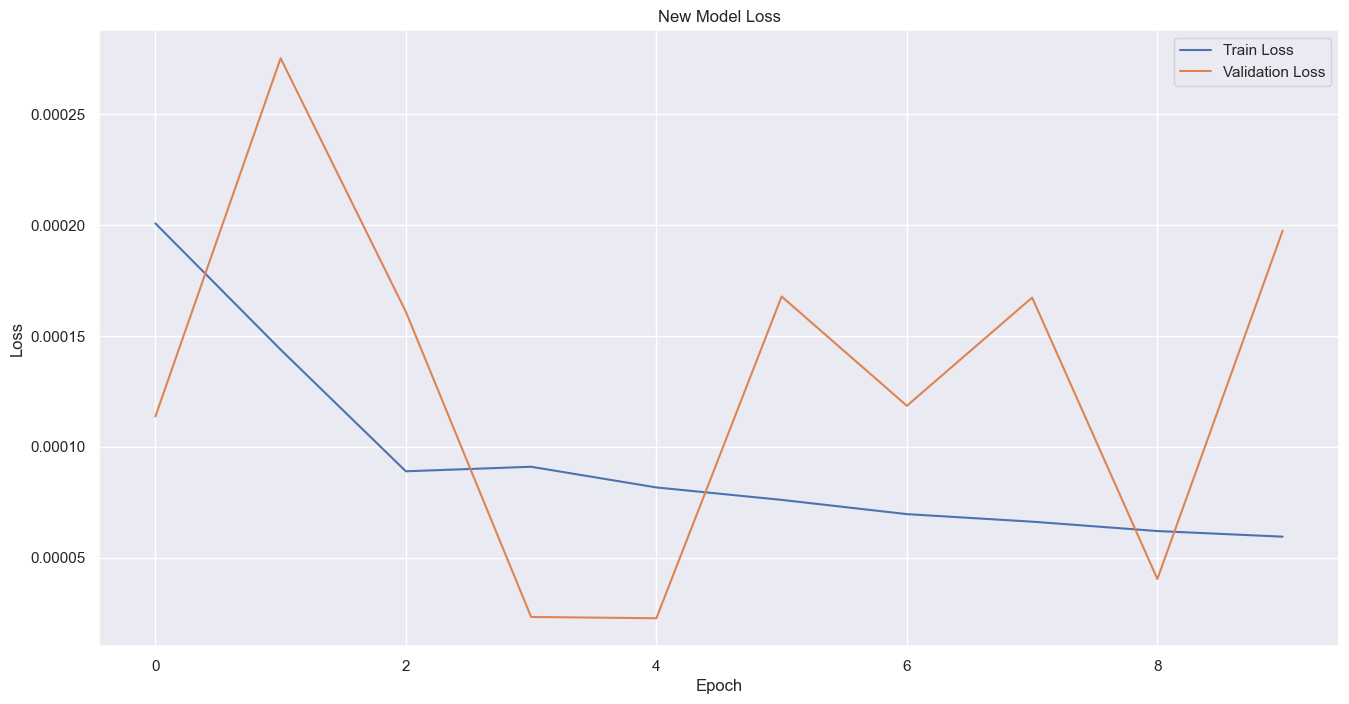

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


C:\Users\MSI\AppData\Local\Temp\ipykernel_5312\241172524.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_valid['predictions'] = new_predictions


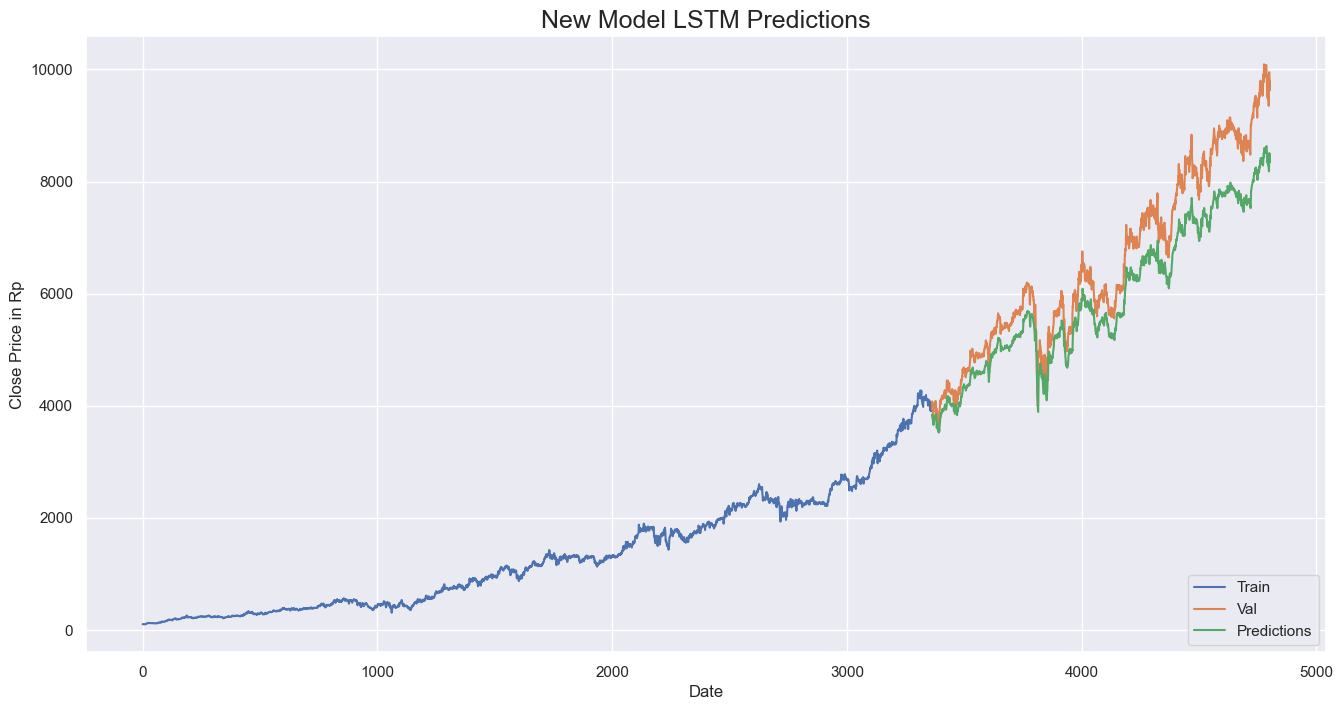

In [24]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load and preprocess the data
new_df = pd.read_csv('BBCA.csv')
new_data = new_df.filter(['Close'])
new_dataset = new_data.values

scaler = MinMaxScaler(feature_range=(0, 1))
new_scaled_data = scaler.fit_transform(new_dataset)
new_training_data_size = math.ceil(len(new_dataset) * 0.7)
new_train_data = new_scaled_data[0:new_training_data_size, :]

new_x_train = []
new_y_train = []
for i in range(50, len(new_train_data)):
    new_x_train.append(new_train_data[i-50:i, 0])
    new_y_train.append(new_train_data[i, 0])

new_x_train, new_y_train = np.array(new_x_train), np.array(new_y_train)
new_x_train = np.reshape(new_x_train, (new_x_train.shape[0], new_x_train.shape[1], 1))

# Define the model
def build_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(new_x_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))
    return model

# KFold Cross Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
fold_no = 1
loss_per_fold = []

for train_index, val_index in kf.split(new_x_train):
    print(f'Training fold {fold_no}...')

    x_train_fold = new_x_train[train_index]
    y_train_fold = new_y_train[train_index]
    x_val_fold = new_x_train[val_index]
    y_val_fold = new_y_train[val_index]

    # Build and compile the model
    model = build_model()
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Load the pretrained weights into the new model
    try:
        model.save_weights('lstm_model_ihsg2_weights.weights.h5')
    except ValueError as e:
        print(f"Error loading weights for fold {fold_no}: {e}")
        continue

    # Train the model
    history = model.fit(x_train_fold, y_train_fold, batch_size=1, epochs=10, validation_data=(x_val_fold, y_val_fold))

    # Collect the loss for this fold
    loss_per_fold.append(history.history['val_loss'])

    fold_no += 1

# Plot the loss for each fold
plt.figure(figsize=(16,8))
for i, loss in enumerate(loss_per_fold):
    plt.plot(loss, label=f'Fold {i+1} Validation Loss')
plt.title('K-Fold Cross Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Fine-tune the model on the whole training data
new_model = build_model()
new_model.load_weights('lstm_model_ihsg2_weights.weights.h5')
new_model.compile(optimizer='adam', loss='mean_squared_error')
new_history = new_model.fit(new_x_train, new_y_train, batch_size=1, epochs=10, validation_split=0.2)

# Plot training & validation loss values for new model
plt.figure(figsize=(16,8))
plt.plot(new_history.history['loss'], label='Train Loss')
plt.plot(new_history.history['val_loss'], label='Validation Loss')
plt.title('New Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Evaluate the new model on test data
new_test_data = new_scaled_data[new_training_data_size - 50:, :]
new_x_test = []
new_y_test = new_dataset[new_training_data_size:, :]
for i in range(50, len(new_test_data)):
    new_x_test.append(new_test_data[i-50:i, 0])

new_x_test = np.array(new_x_test)
new_x_test = np.reshape(new_x_test, (new_x_test.shape[0], new_x_test.shape[1], 1))

new_predictions = new_model.predict(new_x_test)
new_predictions = scaler.inverse_transform(new_predictions)

new_train = new_data[:new_training_data_size]
new_valid = new_data[new_training_data_size:]
new_valid['predictions'] = new_predictions

plt.figure(figsize=(16,8))
plt.title('New Model LSTM Predictions', fontsize=18)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price in Rp', fontsize=12)
plt.plot(new_train['Close'])
plt.plot(new_valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

CNN

Training fold 1...
Epoch 1/10


C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0104 - val_loss: 4.2451e-04
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0925e-04 - val_loss: 3.2941e-04
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.5900e-04 - val_loss: 2.9186e-04
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8467e-04 - val_loss: 2.3070e-04
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3373e-04 - val_loss: 2.0494e-04
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2747e-04 - val_loss: 1.8250e-04
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9175e-04 - val_loss: 1.8704e-04
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8548e-04 - val_loss: 2.6267e-04
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0209e-04 - val_loss: 3.2349e-04
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0203e-04 - val_loss: 1.4645e-04
Training fold 2...
Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0175 - val_los

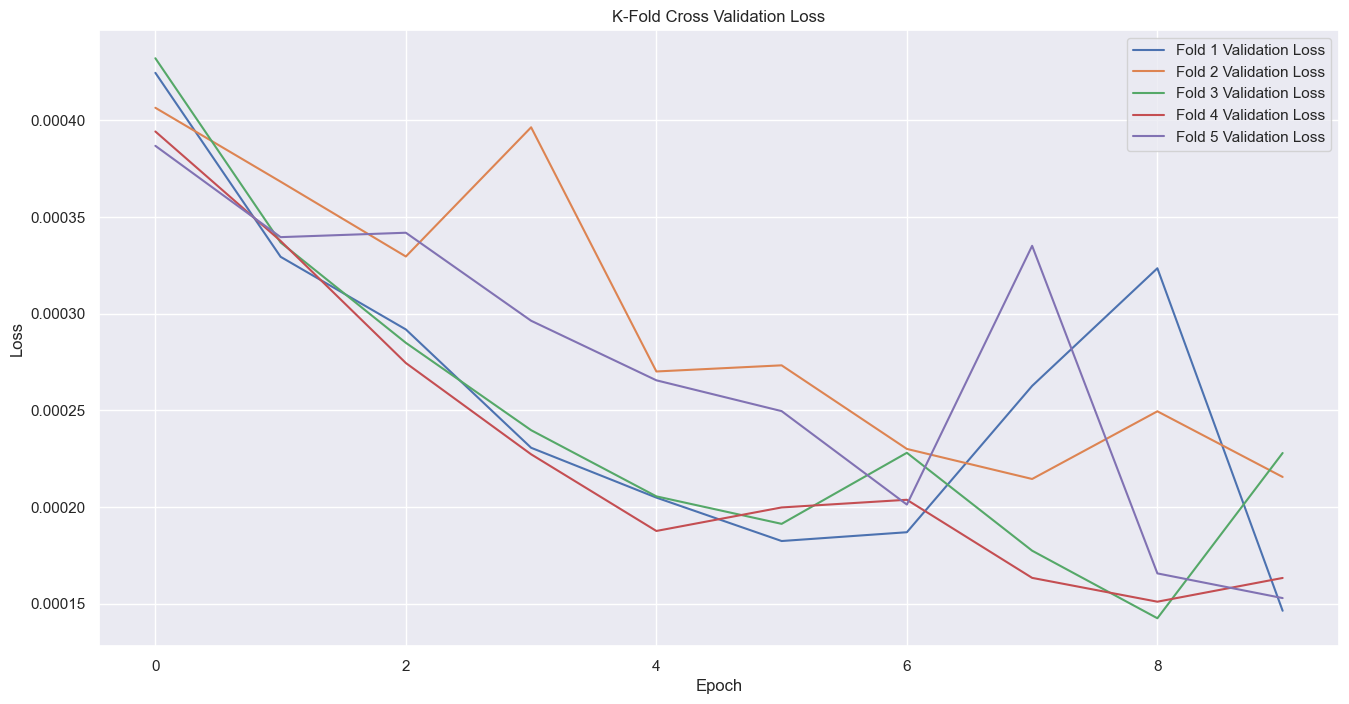

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.9941e-05 - val_loss: 0.0015
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.9012e-05 - val_loss: 0.0017
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.5274e-05 - val_loss: 0.0013
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2528e-05 - val_loss: 0.0017
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.7634e-05 - val_loss: 0.0013
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3159e-05 - val_loss: 8.4506e-04
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.2894e-05 - val_loss: 0.0013
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.2530e-05 - val_loss: 0.0018
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2914e-05 - val_loss: 8.0530e-04
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train Mean Squared Error (MSE): 257

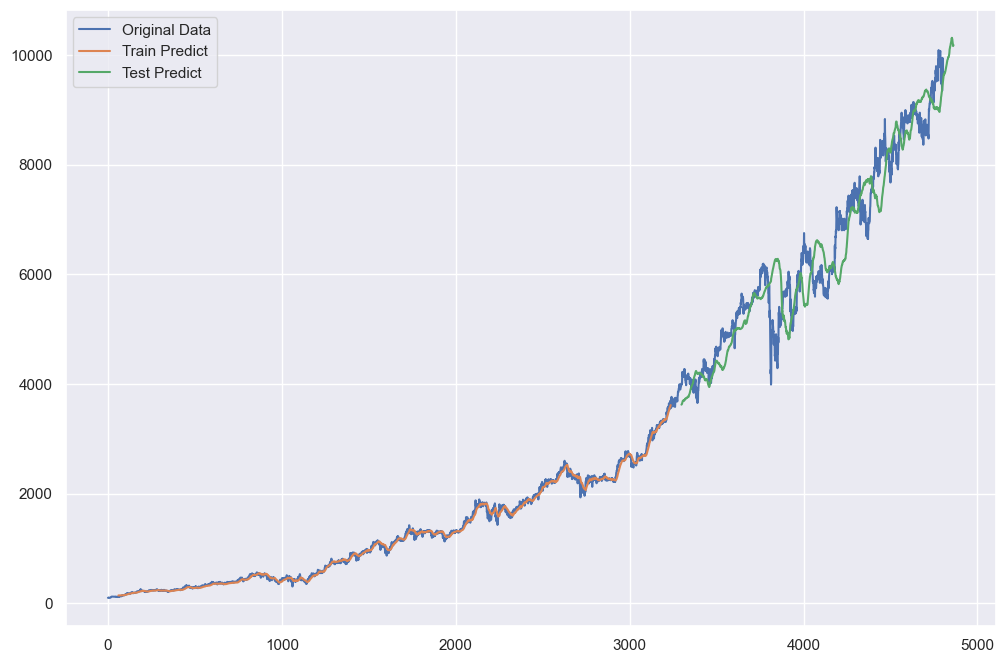

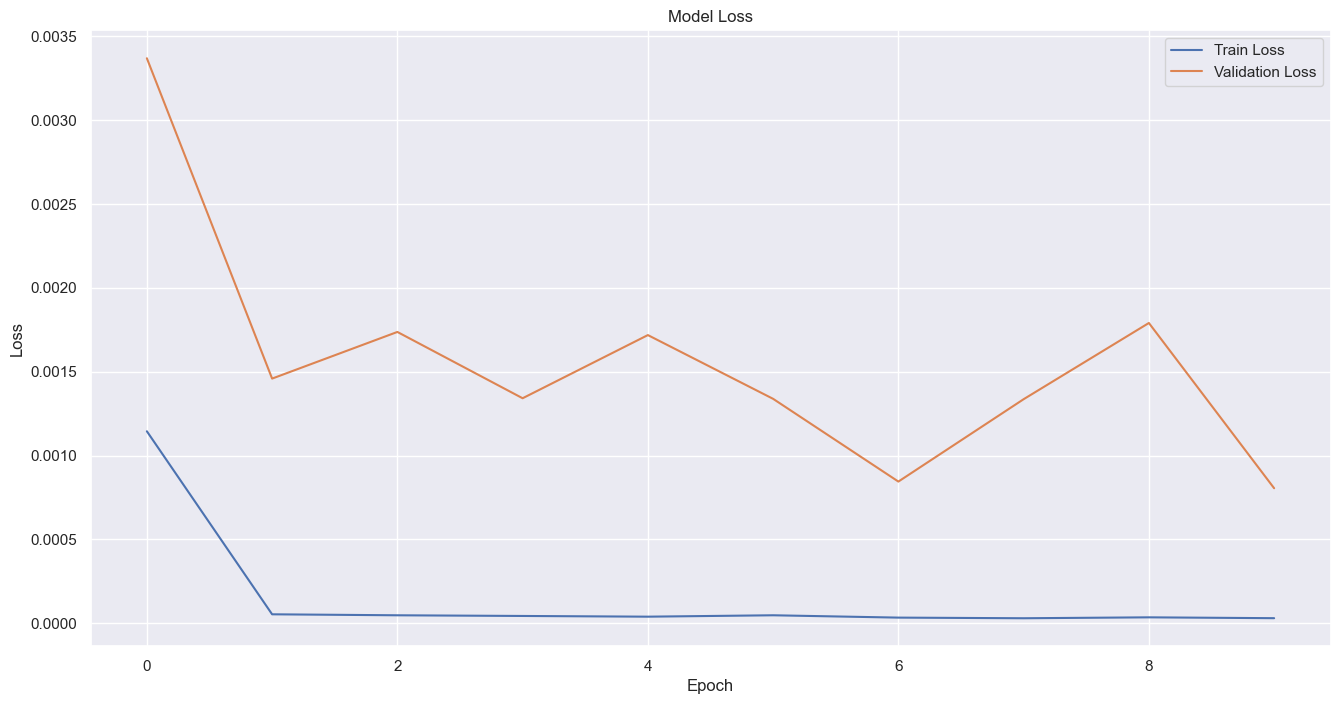

 1/49 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step

C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
New Test Mean Squared Error (MSE): 80352.81248249924
New Test Root Mean Squared Error (RMSE): 283.4657165910884
New Test Mean Absolute Error (MAE): 211.03682951028355
New Test R-squared (R²): 0.9721719693095076


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data
data = pd.read_csv('BBCA.csv')
prices = data['Close'].values.reshape(-1, 1)

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Prepare the data for CNN
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_prices, time_step)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Define the model
def build_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_step, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# KFold Cross Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
fold_no = 1
loss_per_fold = []

for train_index, val_index in kf.split(X):
    print(f'Training fold {fold_no}...')

    x_train_fold, x_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Build and compile the model
    model = build_model()

    # Train the model
    history = model.fit(x_train_fold, y_train_fold, batch_size=64, epochs=10, validation_data=(x_val_fold, y_val_fold))

    # Collect the loss for this fold
    loss_per_fold.append(history.history['val_loss'])

    fold_no += 1

# Plot the loss for each fold
plt.figure(figsize=(16, 8))
for i, loss in enumerate(loss_per_fold):
    plt.plot(loss, label=f'Fold {i + 1} Validation Loss')
plt.title('K-Fold Cross Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Train the model on the full training data
train_size = int(len(X) * 0.67)
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

model = build_model()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, verbose=1)

# Save model weights
model.save_weights('lstm_model_ihsg2_weights.weights.h5')

# Predict
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics
train_mse = mean_squared_error(y_train, train_predict)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, train_predict)
train_r2 = r2_score(y_train, train_predict)

test_mse = mean_squared_error(y_test, test_predict)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_predict)
test_r2 = r2_score(y_test, test_predict)

print(f'Train Mean Squared Error (MSE): {train_mse}')
print(f'Train Root Mean Squared Error (RMSE): {train_rmse}')
print(f'Train Mean Absolute Error (MAE): {train_mae}')
print(f'Train R-squared (R²): {train_r2}')

print(f'Test Mean Squared Error (MSE): {test_mse}')
print(f'Test Root Mean Squared Error (RMSE): {test_rmse}')
print(f'Test Mean Absolute Error (MAE): {test_mae}')
print(f'Test R-squared (R²): {test_r2}')

# Plotting original data and predictions
plt.figure(figsize=(12, 8))
plt.plot(prices, label='Original Data')
plt.plot(np.arange(time_step, time_step + len(train_predict)), train_predict, label='Train Predict')
plt.plot(np.arange(len(train_predict) + 2 * time_step + 1, len(train_predict) + 2 * time_step + 1 + len(test_predict)), test_predict, label='Test Predict')
plt.legend()
plt.show()

# Plotting training & validation loss values
plt.figure(figsize=(16, 8))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Re-build model to load weights
new_model = build_model()
new_model.load_weights('lstm_model_ihsg2_weights.weights.h5')

# Predict using the loaded model
new_test_predict = new_model.predict(X_test)
new_test_predict = scaler.inverse_transform(new_test_predict)

# Evaluate the loaded model
new_test_mse = mean_squared_error(y_test, new_test_predict)
new_test_rmse = np.sqrt(new_test_mse)
new_test_mae = mean_absolute_error(y_test, new_test_predict)
new_test_r2 = r2_score(y_test, new_test_predict)

print(f'New Test Mean Squared Error (MSE): {new_test_mse}')
print(f'New Test Root Mean Squared Error (RMSE): {new_test_rmse}')
print(f'New Test Mean Absolute Error (MAE): {new_test_mae}')
print(f'New Test R-squared (R²): {new_test_r2}')


T-Test

Pada bagian ini, akan diuji perbandingan antara LSTM dan CNN

LSTM - Mean: 4.4748e-05, Std Dev: 1.0442563669904051e-05
CNN - Mean: 0.00028188000000000003, Std Dev: 3.047539335267061e-05
T-statistic: -15.064969412784944, P-value: 0.00011314295317299837


C:\Users\MSI\AppData\Local\Temp\ipykernel_5312\2292448439.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([lstm_losses, cnn_losses], labels=['LSTM', 'CNN'])


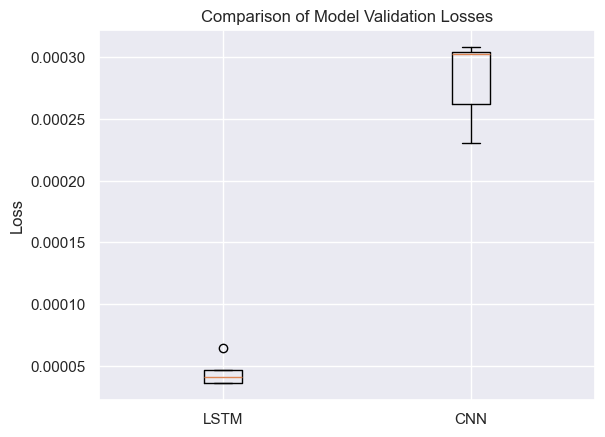

Ada perbedaan yang signifikan antara performa model LSTM dan CNN.


In [26]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Misalnya, hasil validasi dari k-fold untuk kedua model (simulasi data)
# Gantikan dengan hasil validasi sebenarnya dari cross-validation Anda
lstm_losses = [0.00004669, 0.00003607, 0.00006413, 0.00003613, 0.00004072]  # Hasil validasi LSTM
cnn_losses = [0.0002310, 0.0003048, 0.0003085, 0.0003028, 0.0002623]  # Hasil validasi CNN

# Hitung rata-rata dan standar deviasi untuk setiap model
lstm_mean = np.mean(lstm_losses)
lstm_std = np.std(lstm_losses)
cnn_mean = np.mean(cnn_losses)
cnn_std = np.std(cnn_losses)

print(f'LSTM - Mean: {lstm_mean}, Std Dev: {lstm_std}')
print(f'CNN - Mean: {cnn_mean}, Std Dev: {cnn_std}')

# Uji T berpasangan
t_stat, p_value = stats.ttest_rel(lstm_losses, cnn_losses)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

# Visualisasi hasil
plt.boxplot([lstm_losses, cnn_losses], labels=['LSTM', 'CNN'])
plt.title('Comparison of Model Validation Losses')
plt.ylabel('Loss')
plt.show()

# Interpretasi hasil uji t
alpha = 0.05  # Signifikansi level
if p_value < alpha:
    print("Ada perbedaan yang signifikan antara performa model LSTM dan CNN.")
else:
    print("Tidak ada perbedaan yang signifikan antara performa model LSTM dan CNN.")